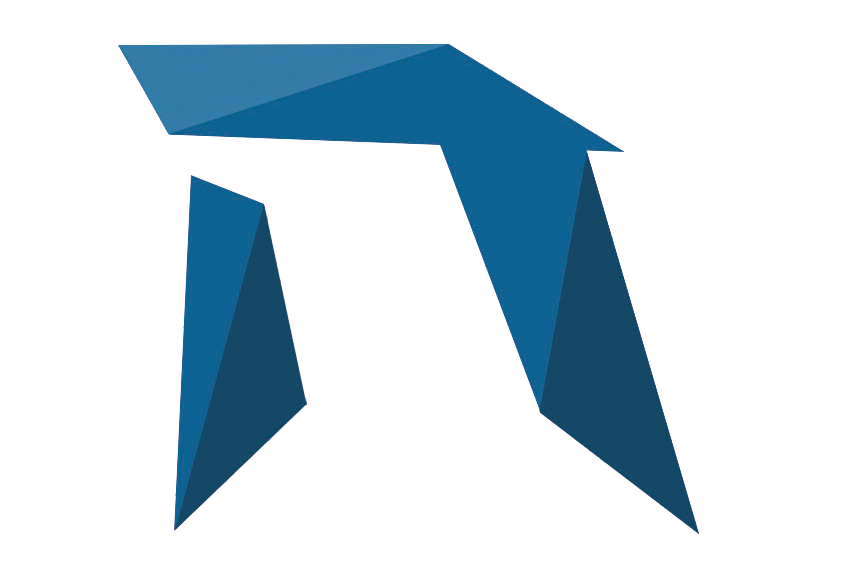

***
# HEICODERS ACADEMY
<b>AI200: Applied Machine Learning</b><br>
***
<b>Capstone Project:</b> Kaggle Dataset Walkthrough 
***

<b>Dataset Used:</b>

- Human or Robot Dataset (Facebook Recruitment Challenge) from Kaggle

1.Understanding the Dataset
===
***

## 1a. Import Dataset

We import the dataset using <code>read_csv()</code>

In [1]:
import pandas as pd

bids_df = pd.read_csv('data/bids.csv')
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

## 1b. How many rows/columns in each dataset?

To check this, we identify the dimensionality of the data using <code>.shape</code>

In [2]:
print(train_df.shape)
print(test_df.shape)
print(bids_df.shape)

(2013, 4)
(4700, 3)
(7656334, 9)


## 1c. How does each dataset look like?

Next, we apply <code>.head()</code> to each of the dataset to understand the specific nature of data each of them contains.

In [3]:
train_df.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


In [4]:
test_df.head()

,bidder_id,payment_account,address
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa


In [5]:
bids_df.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


## 1d. Important note on bidder_id: some bidders do not have bid history in bids.csv

We use the <code>.nunique()</code> to see the unique bidder IDs in each dataset. Through this, we can see that some of the bidders do not have any bid history in bids.csv

print(train_df.bidder_id.nunique())
print(test_df.bidder_id.nunique())
print(bids_df.bidder_id.nunique())

train_bidder_ids = list(train_df.bidder_id)
test_bidder_ids = list(test_df.bidder_id)
bids_bidder_ids = list(bids_df.bidder_id.unique())

<!-- print(train_bidder_ids[:5]) -->

not_found = []
for bidderid in train_bidder_ids:
    if bidderid not in bids_bidder_ids:
        not_found.append(bidderid)
<!-- print(len(not_found), 'bidder ids from train.csv are not found in bids.csv') -->

not_found = []
for bidderid in test_bidder_ids:
    if bidderid not in bids_bidder_ids:
        not_found.append(bidderid)
<!-- print(len(not_found), 'bidder ids from test.csv are not found in bids.csv') -->

In [6]:
url_counts = bids_df.groupby("url").nunique()
url_counts.value_counts

<bound method DataFrame.value_counts of                  bid_id  bidder_id  auction  merchandise  device  time  \
url                                                                      
00018jv10bfpamj       1          1        1            1       1     1   
0004ol1xqaacb1i       1          1        1            1       1     1   
0004p492iser04c       1          1        1            1       1     1   
0006rggh5wbol5p       1          1        1            1       1     1   
0007zqw4d25fucy       3          1        1            1       3     3   
...                 ...        ...      ...          ...     ...   ...   
zzzxmri6opgbwms       1          1        1            1       1     1   
zzzxpv4hcb0t45c       2          1        2            1       1     2   
zzzyacx97kqgj9i       1          1        1            1       1     1   
zzzyqvb5s4bk67y       1          1        1            1       1     1   
zzzzs4vfq9tfa1y       1          1        1            1       1     1  

2.Feature Engineering
===
***

## 2a. Simple Data Aggregation example (one feature) with `.count()`

We make use of <code>groupby()</code> and <code>count()</code> to generate new and interesting data

In [7]:
import numpy as np

bidder_counts = bids_df.groupby("bidder_id")['time'].count().reset_index()
bidder_counts = bidder_counts.rename(columns={'time':'num_bids'})
bidder_counts['log_num_bids'] = (bidder_counts['num_bids']+1).transform(np.log)
bidder_counts

,bidder_id,num_bids,log_num_bids
0,001068c415025a009fee375a12cff4fcnht8y,1,0.693147
1,002d229ffb247009810828f648afc2ef593rb,2,1.098612
2,0030a2dd87ad2733e0873062e4f83954mkj86,1,0.693147
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3,1.386294
4,00486a11dff552c4bd7696265724ff81yeo9v,20,3.044522
...,...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,25075,10.129666
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,22,3.135494
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1,0.693147
6612,ffd62646d600b759a985d45918bd6f0431vmz,664,6.499787


In [8]:
from statistics import mean , median 
from scipy.stats import entropy

entropy_ips_per_auc = bids_df.groupby("bidder_id")

def ips_entropy_auc(group):

    auc_dict = {}
    ip_list = []
    for row_index, row in group.iterrows():
        ip = row['ip']
        auction = row['auction']
        
        if ip not in ip_list:
            ip_list.append(ip)
        
        if auction not in auc_dict:
            auc_dict[auction] = [ip]
        elif ip not in auc_dict[auction]:
            auc_dict[auction] += [ip]
    
    ip_count_per_auc = []
    for ips in auc_dict.values():
        ip_count_per_auc.append(len(ips))
    
    ip_percent_list = []
    
    for ip_count in ip_count_per_auc:
        
        percent = ip_count/len(ip_list)   
        ip_percent_list.append(percent)
    
#     print(ip_percent_list)
    bid_entropy = entropy(ip_percent_list)

    return bid_entropy

# def time_diff_func(group):
    
#     for index in group.time:
#     first_time = []
#     diffs = []
#     for time in group.time:
    
#         if len(first_time) == 0:
#             first_time.append(time)
#             print(first_time)
#         else:
#             diff = time - first_time[0]
#             diffs.append(diff)
#         first_time.clear()
#         first_time.append(time)
    
#     if len(diffs) == 0:
#         return 0
#     return median(diffs)

ips_entropy_per_auc = entropy_ips_per_auc.apply(ips_entropy_auc)

In [9]:
ips_entropy_per_auc = pd.DataFrame(ips_entropy_per_auc)
ips_entropy_per_auc = ips_entropy_per_auc.rename(columns={0:'ips_entropy_per_auc'})
ips_entropy_per_auc = ips_entropy_per_auc.reset_index()
ips_entropy_per_auc['log_ips_entropy_per_auc'] = (ips_entropy_per_auc['ips_entropy_per_auc']+1).transform(np.log)
ips_entropy_per_auc

,bidder_id,ips_entropy_per_auc,log_ips_entropy_per_auc
0,001068c415025a009fee375a12cff4fcnht8y,0.000000,0.000000
1,002d229ffb247009810828f648afc2ef593rb,0.000000,0.000000
2,0030a2dd87ad2733e0873062e4f83954mkj86,0.000000,0.000000
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.098612,0.741276
4,00486a11dff552c4bd7696265724ff81yeo9v,2.484367,1.248286
...,...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,4.310895,1.669760
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,2.622996,1.287301
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,0.000000,0.000000
6612,ffd62646d600b759a985d45918bd6f0431vmz,3.556497,1.516554


In [10]:
from statistics import mean , median 
from scipy.stats import entropy

entropy_auc = bids_df.groupby("bidder_id")

def bid_entropy_per_auc(group):

    auc_dict = {}
    total_bids = 0
    for row_index, row in group.iterrows():
        total_bids += 1
        auction = row['auction']
        
        if auction not in auc_dict:
            auc_dict[auction] = 1
        else:
            auc_dict[auction] += 1
            
    auction_percent_list = []
    
    for auc_bids in auc_dict.values():
        
        percent = auc_bids/total_bids   
        auction_percent_list.append(percent)
    
#     print(ip_percent_list)
    bid_entropy = entropy(auction_percent_list)

    return bid_entropy

# def time_diff_func(group):
    
#     for index in group.time:
#     first_time = []
#     diffs = []
#     for time in group.time:
    
#         if len(first_time) == 0:
#             first_time.append(time)
#             print(first_time)
#         else:
#             diff = time - first_time[0]
#             diffs.append(diff)
#         first_time.clear()
#         first_time.append(time)
    
#     if len(diffs) == 0:
#         return 0
#     return median(diffs)

auc_entropy = entropy_auc.apply(bid_entropy_per_auc)

In [11]:
bids_entropy_auc = pd.DataFrame(auc_entropy)
bids_entropy_auc = bids_entropy_auc.rename(columns={0:'bids_entropy_auc'})
bids_entropy_auc = bids_entropy_auc.reset_index()
bids_entropy_auc['log_bids_entropy_auc'] = (bids_entropy_auc['bids_entropy_auc']+1).transform(np.log)


In [12]:
from statistics import mean , median 
from scipy.stats import entropy

entropy_country = bids_df.groupby("bidder_id")

def bid_entropy_per_country(group):

    coun_dict = {}
    total_bids = 0
    for row_index, row in group.iterrows():
        total_bids += 1
        country = row['country']
        
        if country not in coun_dict:
            coun_dict[country] = 1
        else:
            coun_dict[country] += 1
            
    country_percent_list = []
    
    for url_bids in coun_dict.values():
        
        percent = url_bids/total_bids   
        country_percent_list.append(percent)
    
#     print(ip_percent_list)
    bid_entropy = entropy(country_percent_list)

    return bid_entropy

# def time_diff_func(group):
    
#     for index in group.time:
#     first_time = []
#     diffs = []
#     for time in group.time:
    
#         if len(first_time) == 0:
#             first_time.append(time)
#             print(first_time)
#         else:
#             diff = time - first_time[0]
#             diffs.append(diff)
#         first_time.clear()
#         first_time.append(time)
    
#     if len(diffs) == 0:
#         return 0
#     return median(diffs)

grace = entropy_country.apply(bid_entropy_per_country)

In [13]:
bids_entropy_coun = pd.DataFrame(grace)
bids_entropy_coun = bids_entropy_coun.rename(columns={0:'bids_entropy_country'})
bids_entropy_coun = bids_entropy_coun.reset_index()
bids_entropy_coun_diff = train_df[['bidder_id','outcome']].merge(bids_entropy_coun,on = 'bidder_id',how='left' )
bids_entropy_coun_diff

,bidder_id,outcome,bids_entropy_country
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,1.337882
1,624f258b49e77713fc34034560f93fb3hu3jo,0.0,0.000000
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,0.0,0.000000
3,4bee9aba2abda51bf43d639013d6efe12iycd,0.0,0.000000
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,0.0,0.038969
...,...,...,...
2008,369515b3af4f8ca582f90271d30b14b6r52aw,0.0,0.774507
2009,f939c17ffc7c39ac9b35b69e5e75179fv9pe2,0.0,0.000000
2010,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,0.0,0.000000
2011,0381a69b7a061e9ace2798fd48f1f537mgq57,0.0,0.000000


In [14]:
bids_entropy_coun['log_bids_entropy_country'] = (bids_entropy_coun['bids_entropy_country']+1).transform(np.log)


In [15]:
bids_entropy_coun_diff[same_response_diff['outcome'] == 1].mean()

NameError: name 'same_response_diff' is not defined

In [16]:
from statistics import mean , median 
from scipy.stats import entropy

entropy_url = bids_df.groupby("bidder_id")

def bid_entropy_per_ip(group):

    url_dict = {}
    total_bids = 0
    for row_index, row in group.iterrows():
        total_bids += 1
        url = row['url']
        
        if url not in url_dict:
            url_dict[url] = 1
        else:
            url_dict[url] += 1
            
            
    url_percent_list = []
    
    for url_bids in url_dict.values():
        
        percent = url_bids/total_bids   
        url_percent_list.append(percent)
    
#     print(ip_percent_list)
    bid_entropy = entropy(url_percent_list)

    return bid_entropy

# def time_diff_func(group):
    
#     for index in group.time:
#     first_time = []
#     diffs = []
#     for time in group.time:
    
#         if len(first_time) == 0:
#             first_time.append(time)
#             print(first_time)
#         else:
#             diff = time - first_time[0]
#             diffs.append(diff)
#         first_time.clear()
#         first_time.append(time)
    
#     if len(diffs) == 0:
#         return 0
#     return median(diffs)

hope = entropy_url.apply(bid_entropy_per_ip)
hope

bidder_id
001068c415025a009fee375a12cff4fcnht8y    0.000000
002d229ffb247009810828f648afc2ef593rb    0.000000
0030a2dd87ad2733e0873062e4f83954mkj86    0.000000
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o    0.636514
00486a11dff552c4bd7696265724ff81yeo9v    1.442783
                                           ...   
ffbc0fdfbf19a8a9116b68714138f2902cc13    6.329984
ffc4e2dd2cc08249f299cab46ecbfacfobmr3    2.275829
ffd29eb307a4c54610dd2d3d212bf3bagmmpl    0.000000
ffd62646d600b759a985d45918bd6f0431vmz    2.208577
fff2c070d8200e0a09150bd81452ce29ngcnv    0.000000
Length: 6614, dtype: float64

In [17]:
bids_entropy_url = pd.DataFrame(hope)
bids_entropy_url = bids_entropy_url.rename(columns={0:'bids_entropy_per_url'})
bids_entropy_url = bids_entropy_url.reset_index()
bids_entropy_url_diff = train_df[['bidder_id','outcome']].merge(bids_entropy_url,on = 'bidder_id',how='left' )
bids_entropy_url_diff

,bidder_id,outcome,bids_entropy_per_url
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,0.000000
1,624f258b49e77713fc34034560f93fb3hu3jo,0.0,0.636514
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,0.0,0.562335
3,4bee9aba2abda51bf43d639013d6efe12iycd,0.0,0.000000
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,0.0,3.535815
...,...,...,...
2008,369515b3af4f8ca582f90271d30b14b6r52aw,0.0,0.286836
2009,f939c17ffc7c39ac9b35b69e5e75179fv9pe2,0.0,0.000000
2010,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,0.0,0.000000
2011,0381a69b7a061e9ace2798fd48f1f537mgq57,0.0,0.000000


In [18]:
bids_entropy_url['log_bids_entropy_url'] = (bids_entropy_url['bids_entropy_per_url']+1).transform(np.log)


In [19]:
from statistics import mean , median 
from scipy.stats import entropy

entropy_ip = bids_df.groupby("bidder_id")

def bid_entropy_per_url(group):

    ip_dict = {}
    total_bids = 0
    for row_index, row in group.iterrows():
        total_bids += 1
        ip = row['ip']
        
        if ip not in ip_dict:
            ip_dict[ip] = 1
        else:
            ip_dict[ip] += 1
            
            
    ip_percent_list = []
    
    for ip_bids in ip_dict.values():
        
        percent = ip_bids/total_bids   
        ip_percent_list.append(percent)
    
#     print(ip_percent_list)
    bid_entropy = entropy(ip_percent_list)

    return bid_entropy

# def time_diff_func(group):
    
#     for index in group.time:
#     first_time = []
#     diffs = []
#     for time in group.time:
    
#         if len(first_time) == 0:
#             first_time.append(time)
#             print(first_time)
#         else:
#             diff = time - first_time[0]
#             diffs.append(diff)
#         first_time.clear()
#         first_time.append(time)
    
#     if len(diffs) == 0:
#         return 0
#     return median(diffs)

bless = entropy_ip.apply(bid_entropy_per_url)
bless

bidder_id
001068c415025a009fee375a12cff4fcnht8y    0.000000
002d229ffb247009810828f648afc2ef593rb    0.000000
0030a2dd87ad2733e0873062e4f83954mkj86    0.000000
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o    1.098612
00486a11dff552c4bd7696265724ff81yeo9v    2.111631
                                           ...   
ffbc0fdfbf19a8a9116b68714138f2902cc13    9.484753
ffc4e2dd2cc08249f299cab46ecbfacfobmr3    2.838989
ffd29eb307a4c54610dd2d3d212bf3bagmmpl    0.000000
ffd62646d600b759a985d45918bd6f0431vmz    3.356198
fff2c070d8200e0a09150bd81452ce29ngcnv    0.000000
Length: 6614, dtype: float64

In [20]:
bids_entropy_ip = pd.DataFrame(bless)
bids_entropy_ip = bids_entropy_ip.rename(columns={0:'bids_entropy_per_ip'})
bids_entropy_ip = bids_entropy_ip.reset_index()
bids_entropy_ip

,bidder_id,bids_entropy_per_ip
0,001068c415025a009fee375a12cff4fcnht8y,0.000000
1,002d229ffb247009810828f648afc2ef593rb,0.000000
2,0030a2dd87ad2733e0873062e4f83954mkj86,0.000000
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.098612
4,00486a11dff552c4bd7696265724ff81yeo9v,2.111631
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,9.484753
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,2.838989
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,0.000000
6612,ffd62646d600b759a985d45918bd6f0431vmz,3.356198


In [21]:
bids_entropy_ip['log_bids_entropy_ip'] = (bids_entropy_ip['bids_entropy_per_ip']+1).transform(np.log)


In [22]:
bids_entropy_ip_diff = train_df[['bidder_id','outcome']].merge(bids_entropy_ip_diff,on = 'bidder_id',how='left' )
bids_entropy_ip_diff

NameError: name 'bids_entropy_ip_diff' is not defined

In [23]:
instant_response_counts = bids_df.groupby("bidder_id")

def func(group):
    mode = (group.time).mode
    time_dict = {}
    for time in group.time:
        if time not in time_dict:
            time_dict[time] = 1
        else:
            time_dict[time] += 1
    return max(time_dict.values())
    

In [24]:
instant_response = instant_response_counts.apply(func)

In [25]:
same_response_counts = pd.DataFrame(instant_response)
same_response_counts = same_response_counts.rename(columns={0:'num_instant_counts'})
same_response_counts = same_response_counts.reset_index()
same_response_counts

,bidder_id,num_instant_counts
0,001068c415025a009fee375a12cff4fcnht8y,1
1,002d229ffb247009810828f648afc2ef593rb,1
2,0030a2dd87ad2733e0873062e4f83954mkj86,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1
4,00486a11dff552c4bd7696265724ff81yeo9v,1
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,5
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,1
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1
6612,ffd62646d600b759a985d45918bd6f0431vmz,1


In [26]:
same_response_counts['log_counts'] = (same_response_counts['num_instant_counts']+1).transform(np.log)
same_response_counts

,bidder_id,num_instant_counts,log_counts
0,001068c415025a009fee375a12cff4fcnht8y,1,0.693147
1,002d229ffb247009810828f648afc2ef593rb,1,0.693147
2,0030a2dd87ad2733e0873062e4f83954mkj86,1,0.693147
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1,0.693147
4,00486a11dff552c4bd7696265724ff81yeo9v,1,0.693147
...,...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,5,1.791759
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,1,0.693147
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1,0.693147
6612,ffd62646d600b759a985d45918bd6f0431vmz,1,0.693147


In [27]:
same_response_diff = train_df[['bidder_id','outcome']].merge(same_response_counts,on = 'bidder_id',how='left' )
same_response_diff[same_response_diff['outcome'] == 0].mean()

outcome               0.000000
num_instant_counts    1.271664
log_counts            0.787738
dtype: float64

In [28]:
same_response_diff[same_response_diff['outcome'] == 1].mean()

outcome               1.000000
num_instant_counts    2.330097
log_counts            1.136599
dtype: float64

In [29]:
from statistics import mean , median 

response_difference_per_auc = bids_df.groupby("bidder_id")



def response_difference(group):

    time_dict = {}
    for row_index, row in group.iterrows():
        auction = row['auction']
        time = row['time']
        
        if auction not in time_dict:
            time_dict[auction] = [time]
        elif time not in time_dict[auction]:
            time_dict[auction] += [time]
            
            
    difference_list = []
    
    for times in time_dict.values():
        
        diffs = []
        
        if len(times) == 1:
            diffs.append(0)
        
        for index in range(0,len(times)-1):
            diff = times[index + 1] - times[index]
            diffs.append(diff)
         
        difference_list.append(mean(diffs))

    return median(difference_list)

# def time_diff_func(group):
    
#     for index in group.time:
#     first_time = []
#     diffs = []
#     for time in group.time:
    
#         if len(first_time) == 0:
#             first_time.append(time)
#             print(first_time)
#         else:
#             diff = time - first_time[0]
#             diffs.append(diff)
#         first_time.clear()
#         first_time.append(time)
    
#     if len(diffs) == 0:
#         return 0
#     return median(diffs)

res = response_difference_per_auc.apply(response_difference)
res

bidder_id
001068c415025a009fee375a12cff4fcnht8y    0.000000e+00
002d229ffb247009810828f648afc2ef593rb    1.052632e+08
0030a2dd87ad2733e0873062e4f83954mkj86    0.000000e+00
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o    0.000000e+00
00486a11dff552c4bd7696265724ff81yeo9v    0.000000e+00
                                             ...     
ffbc0fdfbf19a8a9116b68714138f2902cc13    3.285386e+11
ffc4e2dd2cc08249f299cab46ecbfacfobmr3    0.000000e+00
ffd29eb307a4c54610dd2d3d212bf3bagmmpl    0.000000e+00
ffd62646d600b759a985d45918bd6f0431vmz    1.958268e+11
fff2c070d8200e0a09150bd81452ce29ngcnv    0.000000e+00
Length: 6614, dtype: float64

In [30]:
response_difference = pd.DataFrame(res)
response_difference = response_difference.rename(columns={0:'response_difference'})
response_difference = response_difference.reset_index()
response_difference

,bidder_id,response_difference
0,001068c415025a009fee375a12cff4fcnht8y,0.000000e+00
1,002d229ffb247009810828f648afc2ef593rb,1.052632e+08
2,0030a2dd87ad2733e0873062e4f83954mkj86,0.000000e+00
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0.000000e+00
4,00486a11dff552c4bd7696265724ff81yeo9v,0.000000e+00
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,3.285386e+11
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,0.000000e+00
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,0.000000e+00
6612,ffd62646d600b759a985d45918bd6f0431vmz,1.958268e+11


In [31]:
def to_ones(value):
    if value == 0:
        return 1
    else:
        return value

In [32]:
response_difference['changed_Os_to_1s'] = response_difference['response_difference'].apply(to_ones)
response_difference

,bidder_id,response_difference,changed_Os_to_1s
0,001068c415025a009fee375a12cff4fcnht8y,0.000000e+00,1.000000e+00
1,002d229ffb247009810828f648afc2ef593rb,1.052632e+08,1.052632e+08
2,0030a2dd87ad2733e0873062e4f83954mkj86,0.000000e+00,1.000000e+00
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0.000000e+00,1.000000e+00
4,00486a11dff552c4bd7696265724ff81yeo9v,0.000000e+00,1.000000e+00
...,...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,3.285386e+11,3.285386e+11
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,0.000000e+00,1.000000e+00
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,0.000000e+00,1.000000e+00
6612,ffd62646d600b759a985d45918bd6f0431vmz,1.958268e+11,1.958268e+11


In [33]:
response_difference['log_difference'] = (response_difference['changed_Os_to_1s']+1).transform(np.log)
response_difference

,bidder_id,response_difference,changed_Os_to_1s,log_difference
0,001068c415025a009fee375a12cff4fcnht8y,0.000000e+00,1.000000e+00,0.693147
1,002d229ffb247009810828f648afc2ef593rb,1.052632e+08,1.052632e+08,18.471974
2,0030a2dd87ad2733e0873062e4f83954mkj86,0.000000e+00,1.000000e+00,0.693147
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0.000000e+00,1.000000e+00,0.693147
4,00486a11dff552c4bd7696265724ff81yeo9v,0.000000e+00,1.000000e+00,0.693147
...,...,...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,3.285386e+11,3.285386e+11,26.517920
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,0.000000e+00,1.000000e+00,0.693147
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,0.000000e+00,1.000000e+00,0.693147
6612,ffd62646d600b759a985d45918bd6f0431vmz,1.958268e+11,1.958268e+11,26.000497


In [34]:
bids_response_diff = train_df[['bidder_id','outcome']].merge(response_difference,on = 'bidder_id',how='left' )
bids_response_diff

,bidder_id,outcome,response_difference,changed_Os_to_1s,log_difference
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,0.000000e+00,1.000000e+00,0.693147
1,624f258b49e77713fc34034560f93fb3hu3jo,0.0,3.233579e+12,3.233579e+12,28.804611
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,0.0,0.000000e+00,1.000000e+00,0.693147
3,4bee9aba2abda51bf43d639013d6efe12iycd,0.0,0.000000e+00,1.000000e+00,0.693147
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,0.0,1.857297e+11,1.857297e+11,25.947558
...,...,...,...,...,...
2008,369515b3af4f8ca582f90271d30b14b6r52aw,0.0,0.000000e+00,1.000000e+00,0.693147
2009,f939c17ffc7c39ac9b35b69e5e75179fv9pe2,0.0,0.000000e+00,1.000000e+00,0.693147
2010,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,0.0,9.798474e+12,9.798474e+12,29.913248
2011,0381a69b7a061e9ace2798fd48f1f537mgq57,0.0,0.000000e+00,1.000000e+00,0.693147


In [35]:
bots_response_diff = bids_response_diff[bids_response_diff['outcome'] == 1]
bots_response_diff['response_difference'].mean()

170935554475.47763

In [36]:
humans_response_diff = bids_response_diff[bids_response_diff['outcome'] == 0]
humans_response_diff['response_difference'].mean()

527776344583.45294

In [37]:
response_difference['log_difference'] = (response_difference['response_difference']+1).transform(np.log)
response_difference['log_difference'].min()

0.0

In [38]:
change_url_per_auc = bids_df.groupby("bidder_id")

def change_url_auc(group):
    
    changes_dict = {}
    for row_index, row in group.iterrows():
        auction = row['auction']
        url = row['url']
        
        if auction not in changes_dict:
            changes_dict[auction] = [url]
        elif url not in changes_dict[auction]:
            changes_dict[auction] += [url]

    change_list = []
    for changes in changes_dict.values():
        change_list.append(len(changes))
        

    return mean(change_list)
                
        
        
#     first_time = []
#     diffs = []
#     for time in group.time:
    
#         if len(first_time) == 0:
#             first_time.append(time)
#             print(first_time)
#         else:
#             diff = time - first_time[0]
#             diffs.append(diff)
#         first_time.clear()
#         first_time.append(time)
    
#     if len(diffs) == 0:
#         return 0
#     return median(diffs)

url_change = change_url_per_auc.apply(change_url_auc)
url_change

bidder_id
001068c415025a009fee375a12cff4fcnht8y     1.000000
002d229ffb247009810828f648afc2ef593rb     1.000000
0030a2dd87ad2733e0873062e4f83954mkj86     1.000000
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o     1.000000
00486a11dff552c4bd7696265724ff81yeo9v     1.307692
                                           ...    
ffbc0fdfbf19a8a9116b68714138f2902cc13    23.139717
ffc4e2dd2cc08249f299cab46ecbfacfobmr3     1.333333
ffd29eb307a4c54610dd2d3d212bf3bagmmpl     1.000000
ffd62646d600b759a985d45918bd6f0431vmz     4.690909
fff2c070d8200e0a09150bd81452ce29ngcnv     1.000000
Length: 6614, dtype: float64

In [39]:
change_url_freq = pd.DataFrame(url_change)
change_url_freq = change_url_freq.rename(columns={0:'change_url_freq'})
change_url_freq = change_url_freq.reset_index()
change_url_freq['change_url_freq'].max()

355.0

In [40]:
change_url_freq['log_change_url_freq'] = (change_url_freq['change_url_freq']+1).transform(np.log)
change_url_freq

,bidder_id,change_url_freq,log_change_url_freq
0,001068c415025a009fee375a12cff4fcnht8y,1.000000,0.693147
1,002d229ffb247009810828f648afc2ef593rb,1.000000,0.693147
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.000000,0.693147
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.000000,0.693147
4,00486a11dff552c4bd7696265724ff81yeo9v,1.307692,0.836248
...,...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,23.139717,3.183859
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,1.333333,0.847298
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1.000000,0.693147
6612,ffd62646d600b759a985d45918bd6f0431vmz,4.690909,1.738870


In [41]:
change_ip_per_auc = bids_df.groupby("bidder_id")

def change_url_auc(group):
    
    changes_dict = {}
    for row_index, row in group.iterrows():
        auction = row['auction']
        ip = row['ip']
        
        if auction not in changes_dict:
            changes_dict[auction] = [ip]
        elif ip not in changes_dict[auction]:
            changes_dict[auction] += [ip]

    change_list = []
    for changes in changes_dict.values():
        change_list.append(len(changes))
        

    return mean(change_list)
                
        
        
#     first_time = []
#     diffs = []
#     for time in group.time:
    
#         if len(first_time) == 0:
#             first_time.append(time)
#             print(first_time)
#         else:
#             diff = time - first_time[0]
#             diffs.append(diff)
#         first_time.clear()
#         first_time.append(time)
    
#     if len(diffs) == 0:
#         return 0
#     return median(diffs)

ip_change = change_ip_per_auc.apply(change_url_auc)
ip_change

bidder_id
001068c415025a009fee375a12cff4fcnht8y     1.000000
002d229ffb247009810828f648afc2ef593rb     1.000000
0030a2dd87ad2733e0873062e4f83954mkj86     1.000000
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o     1.000000
00486a11dff552c4bd7696265724ff81yeo9v     1.538462
                                           ...    
ffbc0fdfbf19a8a9116b68714138f2902cc13    33.740973
ffc4e2dd2cc08249f299cab46ecbfacfobmr3     1.333333
ffd29eb307a4c54610dd2d3d212bf3bagmmpl     1.000000
ffd62646d600b759a985d45918bd6f0431vmz     7.163636
fff2c070d8200e0a09150bd81452ce29ngcnv     1.000000
Length: 6614, dtype: float64

In [42]:
change_ip_freq = pd.DataFrame(ip_change)
change_ip_freq = change_ip_freq.rename(columns={0:'change_ip_freq'})
change_ip_freq = change_ip_freq.reset_index()
change_ip_freq['log_change_ip_freq'] = (change_ip_freq['change_ip_freq']+1).transform(np.log)
change_ip_freq

,bidder_id,change_ip_freq,log_change_ip_freq
0,001068c415025a009fee375a12cff4fcnht8y,1.000000,0.693147
1,002d229ffb247009810828f648afc2ef593rb,1.000000,0.693147
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.000000,0.693147
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.000000,0.693147
4,00486a11dff552c4bd7696265724ff81yeo9v,1.538462,0.931558
...,...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,33.740973,3.547920
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,1.333333,0.847298
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1.000000,0.693147
6612,ffd62646d600b759a985d45918bd6f0431vmz,7.163636,2.099690


In [43]:
countries_per_auc = bids_df.groupby("bidder_id")

def change_country_per_auc(group):
    
    changes_dict = {}
    for row_index, row in group.iterrows():
        auction = row['auction']
        country = row['country']
        
        if auction not in changes_dict:
            changes_dict[auction] = [country]
        elif country not in changes_dict[auction]:
            changes_dict[auction] += [country]
    
    change_list = []
    for changes in changes_dict.values():
        change_list.append(len(changes))
        

    return mean(change_list)
                
        
        
#     first_time = []
#     diffs = []
#     for time in group.time:
    
#         if len(first_time) == 0:
#             first_time.append(time)
#             print(first_time)
#         else:
#             diff = time - first_time[0]
#             diffs.append(diff)
#         first_time.clear()
#         first_time.append(time)
    
#     if len(diffs) == 0:
#         return 0
#     return median(diffs)

no = countries_per_auc.apply(change_country_per_auc)
no

bidder_id
001068c415025a009fee375a12cff4fcnht8y    1.000000
002d229ffb247009810828f648afc2ef593rb    1.000000
0030a2dd87ad2733e0873062e4f83954mkj86    1.000000
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o    1.000000
00486a11dff552c4bd7696265724ff81yeo9v    1.000000
                                           ...   
ffbc0fdfbf19a8a9116b68714138f2902cc13    1.180534
ffc4e2dd2cc08249f299cab46ecbfacfobmr3    1.066667
ffd29eb307a4c54610dd2d3d212bf3bagmmpl    1.000000
ffd62646d600b759a985d45918bd6f0431vmz    1.000000
fff2c070d8200e0a09150bd81452ce29ngcnv    1.000000
Length: 6614, dtype: float64

In [44]:
countries_per_auc = pd.DataFrame(no)
countries_per_auc = countries_per_auc.rename(columns={0:'countries_per_auc'})
countries_per_auc = countries_per_auc.reset_index()
countries_per_auc['countries_per_auc'].max()

20.083333333333332

In [45]:
countries_per_auc['log_countries_per_auc'] = (countries_per_auc['countries_per_auc']+1).transform(np.log)
countries_per_auc

,bidder_id,countries_per_auc,log_countries_per_auc
0,001068c415025a009fee375a12cff4fcnht8y,1.000000,0.693147
1,002d229ffb247009810828f648afc2ef593rb,1.000000,0.693147
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.000000,0.693147
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.000000,0.693147
4,00486a11dff552c4bd7696265724ff81yeo9v,1.000000,0.693147
...,...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,1.180534,0.779570
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,1.066667,0.725937
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1.000000,0.693147
6612,ffd62646d600b759a985d45918bd6f0431vmz,1.000000,0.693147


We combine the new data we generated with <code>train_df</code> using <code>merge()</code>. Thereafter, we replace the NAs with 0 using <code>.fillna()</code>

In [46]:
feature_set = train_df.merge(bidder_counts, on='bidder_id', how='left')  # Make sure NOT to use the default inner join (how='inner')
# print(feature_set.isnull().sum())

feature_set['num_bids'] = feature_set['num_bids'].fillna(0)  # fill nas with zeros
feature_set

,bidder_id,payment_account,address,outcome,num_bids,log_num_bids
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,24.0,3.218876
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,3.0,1.386294
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,4.0,1.609438
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1.0,0.693147
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,155.0,5.049856
...,...,...,...,...,...,...
2008,369515b3af4f8ca582f90271d30b14b6r52aw,a1f85275793c4a782f0a668711f41b927ivc9,e6882cf204a9482edd042b6e31791dfctxzx8,0.0,36.0,3.610918
2009,f939c17ffc7c39ac9b35b69e5e75179fv9pe2,a3d2de7675556553a5f08e4c88d2c2286s1m2,b9b03d5a127eb07aeb9163cdcf524e1344ac9,0.0,1.0,0.693147
2010,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0,2.0,1.098612
2011,0381a69b7a061e9ace2798fd48f1f537mgq57,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,0.0,1.0,0.693147


In [47]:
from statistics import mean

bid_merch = bids_df.groupby("bidder_id")

def common_merch(group):
    merch_dict = {}
    for merch in group.merchandise:
        if merch not in merch_dict:
            merch_dict[merch] = 1
        else:
            merch_dict[merch] += 1
    return max(merch_dict, key = merch_dict.get)

common_merch = bid_merch.apply(common_merch)
common_merch

bidder_id
001068c415025a009fee375a12cff4fcnht8y           jewelry
002d229ffb247009810828f648afc2ef593rb            mobile
0030a2dd87ad2733e0873062e4f83954mkj86            mobile
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o            mobile
00486a11dff552c4bd7696265724ff81yeo9v        home goods
                                              ...      
ffbc0fdfbf19a8a9116b68714138f2902cc13            mobile
ffc4e2dd2cc08249f299cab46ecbfacfobmr3            mobile
ffd29eb307a4c54610dd2d3d212bf3bagmmpl    sporting goods
ffd62646d600b759a985d45918bd6f0431vmz            mobile
fff2c070d8200e0a09150bd81452ce29ngcnv        home goods
Length: 6614, dtype: object

In [48]:
common_merch = pd.DataFrame(common_merch)
common_merch = common_merch.rename(columns={0:'common_merch'})
common_merch = common_merch.reset_index()
common_merch_OH_encoding = pd.get_dummies(common_merch['common_merch']).drop(columns='home goods')
common_merch_OH_encoding_concat_df = pd.concat([common_merch, common_merch_OH_encoding], axis=1)
common_merch_OH_encoding_concat_df

,bidder_id,common_merch,auto parts,books and music,clothing,computers,furniture,jewelry,mobile,office equipment,sporting goods
0,001068c415025a009fee375a12cff4fcnht8y,jewelry,0,0,0,0,0,1,0,0,0
1,002d229ffb247009810828f648afc2ef593rb,mobile,0,0,0,0,0,0,1,0,0
2,0030a2dd87ad2733e0873062e4f83954mkj86,mobile,0,0,0,0,0,0,1,0,0
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,mobile,0,0,0,0,0,0,1,0,0
4,00486a11dff552c4bd7696265724ff81yeo9v,home goods,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,mobile,0,0,0,0,0,0,1,0,0
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,mobile,0,0,0,0,0,0,1,0,0
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,sporting goods,0,0,0,0,0,0,0,0,1
6612,ffd62646d600b759a985d45918bd6f0431vmz,mobile,0,0,0,0,0,0,1,0,0


In [49]:
common_merch_OH_encoding_concat_df = common_merch_OH_encoding_concat_df.drop(columns = 'common_merch')

In [50]:
from statistics import mean

bid_country = bids_df.groupby("bidder_id")

def common_country(group):
    country_dict = {}
    for country in group.country:
        if country not in country_dict:
            country_dict[country] = 1
        else:
            country_dict[country] += 1
    return max(country_dict, key = country_dict.get)

common_country = bid_country.apply(common_country)
common_country

bidder_id
001068c415025a009fee375a12cff4fcnht8y    bn
002d229ffb247009810828f648afc2ef593rb    sg
0030a2dd87ad2733e0873062e4f83954mkj86    ir
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o    id
00486a11dff552c4bd7696265724ff81yeo9v    ng
                                         ..
ffbc0fdfbf19a8a9116b68714138f2902cc13    in
ffc4e2dd2cc08249f299cab46ecbfacfobmr3    ng
ffd29eb307a4c54610dd2d3d212bf3bagmmpl    es
ffd62646d600b759a985d45918bd6f0431vmz    id
fff2c070d8200e0a09150bd81452ce29ngcnv    th
Length: 6614, dtype: object

In [51]:
common_country = pd.DataFrame(common_country)
common_country = common_country.rename(columns={0:'common_country'})
common_country = common_country.reset_index()
common_country_OH_encoding = pd.get_dummies(common_country['common_country']).drop(columns='in')
common_country_OH_encoding_concat_df = pd.concat([common_country, common_country_OH_encoding], axis=1)
common_country_OH_encoding_concat_df.drop(columns = 'common_country')
common_country_OH_encoding_concat_df

,bidder_id,common_country,ae,am,ar,at,au,az,ba,bd,...,tw,tz,ua,uk,us,vn,ye,za,zm,zw
0,001068c415025a009fee375a12cff4fcnht8y,bn,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,002d229ffb247009810828f648afc2ef593rb,sg,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0030a2dd87ad2733e0873062e4f83954mkj86,ir,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,id,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,00486a11dff552c4bd7696265724ff81yeo9v,ng,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,in,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,ng,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,es,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6612,ffd62646d600b759a985d45918bd6f0431vmz,id,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
common_country_OH_encoding_concat_df

,bidder_id,common_country,ae,am,ar,at,au,az,ba,bd,...,tw,tz,ua,uk,us,vn,ye,za,zm,zw
0,001068c415025a009fee375a12cff4fcnht8y,bn,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,002d229ffb247009810828f648afc2ef593rb,sg,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0030a2dd87ad2733e0873062e4f83954mkj86,ir,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,id,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,00486a11dff552c4bd7696265724ff81yeo9v,ng,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,in,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,ng,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,es,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6612,ffd62646d600b759a985d45918bd6f0431vmz,id,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2b. Adding more feature columns with `.nunique()`

Using this method, we can further generate other potentially useful features for each bidder id. 

To demonstrate this, let's try something other than count, for e.g. <code>.nunique()</code>.

**Note: Depending on your computer RAM, the next cell of code may take up to few minutes to run.**

In [53]:
bidder_unique = bids_df.groupby("bidder_id").nunique()
# bidder_unique

In [54]:
bidder_unique = bidder_unique.drop(columns='bidder_id', errors='ignore').reset_index()
# bidder_unique

In [55]:
bidder_unique['url_per_auc'] = bidder_unique.url /  bidder_unique.auction
bidder_unique['log_url_per_auc'] = (bidder_unique['url_per_auc']+1).transform(np.log)
# bidder_unique

In [56]:
bidder_unique['ips_per_auc'] = bidder_unique.ip /  bidder_unique.auction
bidder_unique['log_ips_per_auc'] = (bidder_unique['ips_per_auc']+1).transform(np.log)
# bidder_unique

In [57]:
bidder_unique['dev_per_auc'] = bidder_unique.device /  bidder_unique.auction
bidder_unique['log_dev_per_auc'] = (bidder_unique['dev_per_auc']+1).transform(np.log)
# bidder_unique

In [58]:
bidder_unique['time_per_auc'] = bidder_unique.time /  bidder_unique.auction
bidder_unique['log_time_per_auc'] = (bidder_unique['time_per_auc']+1).transform(np.log)
# bidder_unique

In [59]:
bidder_unique['time_per_dev'] = bidder_unique.time /  bidder_unique.device
bidder_unique['log_bids_per_dev'] = (bidder_unique['time_per_dev']+1).transform(np.log)
# bidder_unique

In [60]:
bidder_unique['time_per_country'] = bidder_unique.time /  bidder_unique.country
bidder_unique['log_bids_per_country'] = (bidder_unique['time_per_country']+1).transform(np.log)
# bidder_unique

In [61]:
bidder_unique['ip_per_country'] = bidder_unique.ip /  bidder_unique.country
bidder_unique['log_bids_per_country'] = (bidder_unique['ip_per_country']+1).transform(np.log)
# bidder_unique

In [62]:
bidder_unique['url_per_country'] = bidder_unique.url /  bidder_unique.country
bidder_unique['log_bids_per_country'] = (bidder_unique['url_per_country']+1).transform(np.log)
# bidder_unique

In [63]:
bidder_unique['dev_per_country'] = bidder_unique.device /  bidder_unique.country
bidder_unique['log_bids_per_country'] = (bidder_unique['dev_per_country']+1).transform(np.log)
# bidder_unique

In [64]:
bidder_unique['time_per_ip'] = bidder_unique.time /  bidder_unique.ip
bidder_unique['log_bids_per_ip'] = (bidder_unique['time_per_ip']+1).transform(np.log)
# bidder_unique

In [65]:
bidder_unique['time_per_url'] = bidder_unique.time /  bidder_unique.url
bidder_unique['log_bids_per_url'] = (bidder_unique['time_per_url']+1).transform(np.log)
# bidder_unique

In [66]:
bidder_unique = bidder_unique.merge(bidder_counts, on='bidder_id', how='left')
bidder_unique

,bidder_id,bid_id,auction,merchandise,device,time,country,ip,url,url_per_auc,...,log_bids_per_country,ip_per_country,url_per_country,dev_per_country,time_per_ip,log_bids_per_ip,time_per_url,log_bids_per_url,num_bids,log_num_bids
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1,1,1.000000,...,0.693147,1.000000,1.000000,1.000000,1.000000,0.693147,1.000000,0.693147,1,0.693147
1,002d229ffb247009810828f648afc2ef593rb,2,1,1,2,2,1,1,1,1.000000,...,1.098612,1.000000,1.000000,2.000000,2.000000,1.098612,2.000000,1.098612,2,1.098612
2,0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1,1,1.000000,...,0.693147,1.000000,1.000000,1.000000,1.000000,0.693147,1.000000,0.693147,1,0.693147
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3,3,1,3,3,1,3,2,0.666667,...,1.386294,3.000000,2.000000,3.000000,1.000000,0.693147,1.500000,0.916291,3,1.386294
4,00486a11dff552c4bd7696265724ff81yeo9v,20,13,1,8,20,1,10,7,0.538462,...,2.197225,10.000000,7.000000,8.000000,2.000000,1.098612,2.857143,1.349927,20,3.044522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,25075,637,1,792,23487,102,18726,8039,12.620094,...,2.170733,183.588235,78.813725,7.764706,1.254245,0.812815,2.921632,1.366508,25075,10.129666
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,22,15,1,13,22,6,18,12,0.800000,...,1.152680,3.000000,2.000000,2.166667,1.222222,0.798508,1.833333,1.041454,22,3.135494
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1,1,1,1,1,1,1,1,1.000000,...,0.693147,1.000000,1.000000,1.000000,1.000000,0.693147,1.000000,0.693147,1,0.693147
6612,ffd62646d600b759a985d45918bd6f0431vmz,664,55,1,96,664,1,37,144,2.618182,...,4.574711,37.000000,144.000000,96.000000,17.945946,2.941590,4.611111,1.724749,664,6.499787


In [67]:
bidder_unique['bid_per_auc'] = bidder_unique.num_bids /  bidder_unique.auction
bidder_unique['log_bid_per_auc'] = (bidder_unique['bid_per_auc']+1).transform(np.log)
# bidder_unique

In [68]:
bidder_unique['bids_per_country'] = bidder_unique.num_bids /  bidder_unique.country
bidder_unique['log_bids_per_country'] = (bidder_unique['bids_per_country']+1).transform(np.log)
# bidder_unique

In [69]:
bidder_unique['bids_per_ip'] = bidder_unique.num_bids /  bidder_unique.ip
bidder_unique['log_bids_per_ip'] = (bidder_unique['bids_per_ip']+1).transform(np.log)
# bidder_unique

In [70]:
bidder_unique['bids_per_url'] = bidder_unique.num_bids /  bidder_unique.url
bidder_unique['log_bids_per_ip'] = (bidder_unique['bids_per_url']+1).transform(np.log)
# bidder_unique

In [71]:
bidder_unique['bids_per_dev'] = bidder_unique.num_bids /  bidder_unique.device
bidder_unique['log_bids_per_ip'] = (bidder_unique['bids_per_dev']+1).transform(np.log)
# bidder_unique

In [72]:
bidder_unique = bidder_unique.merge(same_response_counts, on='bidder_id', how='left')
# bidder_unique

In [73]:
bidder_unique = bidder_unique.merge(response_difference, on='bidder_id', how='left')
# bidder_unique

In [74]:
bidder_unique = bidder_unique.merge(change_url_freq, on='bidder_id', how='left')

In [75]:
bidder_unique = bidder_unique.merge(change_ip_freq, on='bidder_id', how='left')
# bidder_unique

In [76]:
bidder_unique = bidder_unique.merge(countries_per_auc, on='bidder_id', how='left')
# bidder_unique

In [77]:
# bidder_unique = bidder_unique.merge(common_merch_OH_encoding_concat_df, on='bidder_id', how='left')
# # bidder_unique

In [78]:
# feature_set = bidder_unique.merge(common_country_OH_encoding_concat_df, on='bidder_id', how='left')
# feature_set

In [79]:
bidder_unique = bidder_unique.merge(bids_entropy_ip, on='bidder_id', how='left')

In [80]:
bidder_unique = bidder_unique.merge(bids_entropy_url, on='bidder_id', how='left')

In [81]:
bidder_unique = bidder_unique.merge(bids_entropy_coun, on='bidder_id', how='left')

In [82]:
bidder_unique = bidder_unique.merge(bids_entropy_auc, on='bidder_id', how='left')

In [83]:
bidder_unique = bidder_unique.merge(ips_entropy_per_auc, on='bidder_id', how='left')

In [84]:
bidder_unique['log_url'] = (bidder_unique['url']+1).transform(np.log)
bidder_unique['log_auction'] = (bidder_unique['auction']+1).transform(np.log)
bidder_unique['log_device'] = (bidder_unique['device']+1).transform(np.log)
bidder_unique['log_time'] = (bidder_unique['time']+1).transform(np.log)
bidder_unique['log_country'] = (bidder_unique['country']+1).transform(np.log)
bidder_unique['log_ip'] = (bidder_unique['ip']+1).transform(np.log)

In [85]:
bidder_unique

,bidder_id,bid_id,auction,merchandise,device,time,country,ip,url,url_per_auc,...,bids_entropy_auc,log_bids_entropy_auc,ips_entropy_per_auc,log_ips_entropy_per_auc,log_url,log_auction,log_device,log_time,log_country,log_ip
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1,1,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
1,002d229ffb247009810828f648afc2ef593rb,2,1,1,2,2,1,1,1,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,1.098612,1.098612,0.693147,0.693147
2,0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1,1,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3,3,1,3,3,1,3,2,0.666667,...,1.098612,0.741276,1.098612,0.741276,1.098612,1.386294,1.386294,1.386294,0.693147,1.386294
4,00486a11dff552c4bd7696265724ff81yeo9v,20,13,1,8,20,1,10,7,0.538462,...,2.484367,1.248286,2.484367,1.248286,2.079442,2.639057,2.197225,3.044522,0.693147,2.397895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,25075,637,1,792,23487,102,18726,8039,12.620094,...,4.337702,1.674795,4.310895,1.669760,8.992184,6.458338,6.675823,10.064245,4.634729,9.837722
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,22,15,1,13,22,6,18,12,0.800000,...,2.586935,1.277298,2.622996,1.287301,2.564949,2.772589,2.639057,3.135494,1.945910,2.944439
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1,1,1,1,1,1,1,1,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
6612,ffd62646d600b759a985d45918bd6f0431vmz,664,55,1,96,664,1,37,144,2.618182,...,3.276821,1.453210,3.556497,1.516554,4.976734,4.025352,4.574711,6.499787,0.693147,3.637586


Again, we combine the new data we generated with <code>train_df</code> using <code>merge()</code>.

In [86]:
train_set = train_df.merge(bidder_unique, on='bidder_id', how='left')
test_set = test_df.merge(bidder_unique, on='bidder_id', how='left')
train_set

,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,...,bids_entropy_auc,log_bids_entropy_auc,ips_entropy_per_auc,log_ips_entropy_per_auc,log_url,log_auction,log_device,log_time,log_country,log_ip
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,24.0,18.0,1.0,14.0,24.0,6.0,...,2.809678,1.337545,2.809678,1.337545,0.693147,2.944439,2.708050,3.218876,1.945910,3.044522
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,3.0,1.0,1.0,2.0,3.0,1.0,...,0.000000,0.000000,0.000000,0.000000,1.098612,0.693147,1.098612,1.386294,0.693147,1.386294
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,4.0,4.0,1.0,2.0,4.0,1.0,...,1.386294,0.869742,1.386294,0.869742,1.098612,1.609438,1.098612,1.609438,0.693147,1.609438
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,155.0,23.0,1.0,53.0,155.0,2.0,...,2.470807,1.244387,2.469400,1.243982,4.521789,3.178054,3.988984,5.049856,1.098612,4.820282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,369515b3af4f8ca582f90271d30b14b6r52aw,a1f85275793c4a782f0a668711f41b927ivc9,e6882cf204a9482edd042b6e31791dfctxzx8,0.0,36.0,25.0,1.0,4.0,33.0,4.0,...,3.121421,1.416198,3.218876,1.439569,1.098612,3.258097,1.609438,3.526361,1.609438,1.791759
2009,f939c17ffc7c39ac9b35b69e5e75179fv9pe2,a3d2de7675556553a5f08e4c88d2c2286s1m2,b9b03d5a127eb07aeb9163cdcf524e1344ac9,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
2010,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0,2.0,1.0,1.0,2.0,2.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,1.098612,1.098612,0.693147,1.098612
2011,0381a69b7a061e9ace2798fd48f1f537mgq57,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147


In [87]:
train_set.replace([np.inf, -np.inf], np.nan, inplace=True)
test_set.replace([np.inf, -np.inf], np.nan, inplace=True)

In [88]:
checking_see_df = train_set[train_set['outcome'] == 1.0]
checking_see_df

,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,...,bids_entropy_auc,log_bids_entropy_auc,ips_entropy_per_auc,log_ips_entropy_per_auc,log_url,log_auction,log_device,log_time,log_country,log_ip
21,5354c02817e47f28e60e44a40ca5e48dll4sz,1862ef3b7965993cc975a1161010e810w2bwo,58e5dc4d38d886f6c7abf0c264a51cb7alhj2,1.0,181.0,18.0,1.0,51.0,181.0,7.0,...,2.672497,1.300872,2.766856,1.326241,0.693147,2.944439,3.951244,5.204007,2.079442,2.639057
50,9434778d2268f1fa2a8ede48c0cd05c097zey,ee3295c7b31a1e9116ebf0cf2df68ed1ac8ts,627fe7481f01372c02333477471cb237qt2vf,1.0,6540.0,269.0,1.0,408.0,6482.0,65.0,...,1.236513,0.804918,1.590983,0.952037,7.558517,5.598422,6.013715,8.776939,4.189655,8.147867
51,aabc211b4cf4d29e4ac7e7e361371622pockb,a3d2de7675556553a5f08e4c88d2c228pxtr6,a3d2de7675556553a5f08e4c88d2c228bxn98,1.0,2048.0,127.0,1.0,24.0,2044.0,14.0,...,3.354974,1.471319,3.766765,1.561668,1.791759,4.852030,3.218876,7.623153,2.708050,5.883322
58,68d468e15e0de0bab9694cdca8e799eb2j8kn,a3d2de7675556553a5f08e4c88d2c228vf08k,767150cd5a97ed796bfc58456f5500250dsv7,1.0,281.0,26.0,1.0,1.0,277.0,2.0,...,2.598582,1.280540,3.156796,1.424744,2.079442,3.295837,0.693147,5.627621,1.098612,2.197225
77,1cbd9081de4481ada66f1853737f7684ddjd1,a3d2de7675556553a5f08e4c88d2c228buft1,a3d2de7675556553a5f08e4c88d2c228pijoz,1.0,1103.0,107.0,1.0,4.0,1095.0,29.0,...,3.662697,1.539594,3.736905,1.555384,1.609438,4.682131,1.609438,6.999422,3.401197,6.729824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,458c8c4e10e5c1b29e3fbe5ee56d46e8y3fb3,97ee873207ff7c57e70c50637c93c11eqsyjy,480aca092e44d3e23a015e51d8e7daa4hhcss,1.0,1165.0,103.0,1.0,166.0,1162.0,36.0,...,1.249171,0.810562,2.268162,1.184228,6.740519,4.644391,5.117994,7.058758,3.610918,6.028279
1942,022ac3a7ce986049d9a4bede83ccf9ddctvg6,57aec2c76d2db80cf61c2543d15ef9f82tplj,c57c64adcc43ce50d99f184d87981d87yz2di,1.0,1899.0,85.0,1.0,18.0,1574.0,7.0,...,3.524047,1.509407,4.081776,1.625661,1.098612,4.454347,2.944439,7.362011,2.079442,3.496508
1968,6c11cc7744fb52a632306ca8bf966cd1e4zxx,0875307e1731af94b3b64725ad0deb7dg45aa,a10741281aa478c1f3ce0c965debb359rzk56,1.0,642.0,100.0,1.0,164.0,612.0,30.0,...,3.502228,1.504572,3.499662,1.504002,5.897154,4.615121,5.105945,6.418365,3.433987,6.028279
1970,17a321c4a0d925ca80507effa52330ac5n5r7,9366947fbdda1fc29952043326a70b07z0n0q,a3d2de7675556553a5f08e4c88d2c228zf3p2,1.0,2244.0,509.0,1.0,376.0,2236.0,72.0,...,5.186679,1.822399,5.439125,1.862393,5.786897,6.234411,5.932245,7.712891,4.290459,7.056175


#### test_set

In [89]:
train_set.columns

Index(['bidder_id', 'payment_account', 'address', 'outcome', 'bid_id',
       'auction', 'merchandise', 'device', 'time', 'country', 'ip', 'url',
       'url_per_auc', 'log_url_per_auc', 'ips_per_auc', 'log_ips_per_auc',
       'dev_per_auc', 'log_dev_per_auc', 'time_per_auc', 'log_time_per_auc',
       'time_per_dev', 'log_bids_per_dev', 'time_per_country',
       'log_bids_per_country', 'ip_per_country', 'url_per_country',
       'dev_per_country', 'time_per_ip', 'log_bids_per_ip', 'time_per_url',
       'log_bids_per_url', 'num_bids', 'log_num_bids', 'bid_per_auc',
       'log_bid_per_auc', 'bids_per_country', 'bids_per_ip', 'bids_per_url',
       'bids_per_dev', 'num_instant_counts', 'log_counts',
       'response_difference', 'changed_Os_to_1s', 'log_difference',
       'change_url_freq', 'log_change_url_freq', 'change_ip_freq',
       'log_change_ip_freq', 'countries_per_auc', 'log_countries_per_auc',
       'bids_entropy_per_ip', 'log_bids_entropy_ip', 'bids_entropy_per_url',
  

In [90]:
# feature_cols = train_set.drop(columns = ['outcome','bidder_id','payment_account','address','bid_id','changed_Os_to_1s'] )
# feature_cols =  list(feature_cols.columns)
# X = train_set[feature_cols]
# y = train_set['outcome']

# import pandas as pd
# import numpy as np
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# from scipy.stats import chi2_contingency

# bestfeatures = SelectKBest(score_func=chi2, k=10)
# fit = bestfeatures.fit(X,y)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)
# #concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(30,'Score'))  #print 10 best feat

# ['response_difference','ip','time','num_bids','bids_per_dev','bids_per_url','bids_per_country','bids_per_ip','url','auction']

In [91]:
train_set.isnull().sum()

bidder_id           0
payment_account     0
address             0
outcome             0
bid_id             29
                   ..
log_auction        29
log_device         29
log_time           29
log_country        29
log_ip             29
Length: 66, dtype: int64

In [92]:
train_set = train_set.fillna(train_set.mean())
test_set = test_set.fillna(test_set.mean())

In [93]:
train_set = train_set.interpolate(method="cubic")
test_set = test_set.interpolate(method="cubic")

In [94]:
train_set

,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,...,bids_entropy_auc,log_bids_entropy_auc,ips_entropy_per_auc,log_ips_entropy_per_auc,log_url,log_auction,log_device,log_time,log_country,log_ip
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,24.0,18.0,1.0,14.0,24.0,6.0,...,2.809678,1.337545,2.809678,1.337545,0.693147,2.944439,2.708050,3.218876,1.945910,3.044522
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,3.0,1.0,1.0,2.0,3.0,1.0,...,0.000000,0.000000,0.000000,0.000000,1.098612,0.693147,1.098612,1.386294,0.693147,1.386294
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,4.0,4.0,1.0,2.0,4.0,1.0,...,1.386294,0.869742,1.386294,0.869742,1.098612,1.609438,1.098612,1.609438,0.693147,1.609438
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,155.0,23.0,1.0,53.0,155.0,2.0,...,2.470807,1.244387,2.469400,1.243982,4.521789,3.178054,3.988984,5.049856,1.098612,4.820282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,369515b3af4f8ca582f90271d30b14b6r52aw,a1f85275793c4a782f0a668711f41b927ivc9,e6882cf204a9482edd042b6e31791dfctxzx8,0.0,36.0,25.0,1.0,4.0,33.0,4.0,...,3.121421,1.416198,3.218876,1.439569,1.098612,3.258097,1.609438,3.526361,1.609438,1.791759
2009,f939c17ffc7c39ac9b35b69e5e75179fv9pe2,a3d2de7675556553a5f08e4c88d2c2286s1m2,b9b03d5a127eb07aeb9163cdcf524e1344ac9,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
2010,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0,2.0,1.0,1.0,2.0,2.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,1.098612,1.098612,0.693147,1.098612
2011,0381a69b7a061e9ace2798fd48f1f537mgq57,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147


In [95]:
test_set

,bidder_id,payment_account,address,bid_id,auction,merchandise,device,time,country,ip,...,bids_entropy_auc,log_bids_entropy_auc,ips_entropy_per_auc,log_ips_entropy_per_auc,log_url,log_auction,log_device,log_time,log_country,log_ip
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,4.0,3.0,1.0,2.0,4.0,3.0,4.0,...,1.039721,0.712813,1.039721,0.712813,1.386294,1.386294,1.098612,1.609438,1.386294,1.609438
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn,3.0,2.0,1.0,3.0,3.0,2.0,2.0,...,0.636514,0.492568,0.693147,0.526589,0.693147,1.098612,1.386294,1.386294,1.098612,1.098612
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0,17.0,14.0,1.0,4.0,17.0,3.0,4.0,...,2.588573,1.277755,2.615631,1.285266,1.098612,2.708050,1.609438,2.890372,1.386294,1.609438
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat,148.0,90.0,1.0,81.0,148.0,14.0,129.0,...,4.134402,1.635963,4.186776,1.646112,4.394449,4.510860,4.406719,5.003946,2.708050,4.867534
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa,23.0,20.0,1.0,17.0,23.0,2.0,17.0,...,2.954673,1.374898,2.954673,1.374898,0.693147,3.044522,2.890372,3.178054,1.098612,2.890372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695,bef56983ba78b2ee064443ae95972877jfkyd,0f235a6dfea5a5885d63968826b748b4q4dra,a98a4841db165de919d29cb49d0bc306cq21h,983.0,41.0,1.0,9.0,466.0,5.0,22.0,...,3.222238,1.440365,3.328554,1.465233,1.609438,3.737670,2.302585,6.146329,1.791759,3.135494
4696,4da45cc915c32d4368ac7e773d92d4affwqrr,9e0adf7481c422654d4d0a849e0e50abiumen,e23d9777cddc347de82d839b2e54b22ecopkp,66.0,32.0,1.0,29.0,66.0,10.0,49.0,...,2.936905,1.370395,2.926107,1.367648,2.944439,3.496508,3.401197,4.204693,2.397895,3.912023
4697,0d0e6220bf59ab9a0c5b5987fb2c34a9p33f9,7df4ebd184668b4257f740b11d4519afq7kr1,b650404e1ab5d177020221277c3e9306qegyl,2162.0,419.0,1.0,376.0,2156.0,86.0,1460.0,...,5.220635,1.827872,5.252586,1.832995,6.956545,6.040255,5.932245,7.676474,4.465908,7.286876
4698,4981c32c54dde65b79dbc48fd9ab6457caqze,a3d2de7675556553a5f08e4c88d2c2284qlm0,9c35320088eaf32046a51a96ebb2e658i479u,5.0,5.0,1.0,4.0,5.0,1.0,5.0,...,1.609438,0.959135,1.609438,0.959135,1.098612,1.791759,1.609438,1.791759,0.693147,1.791759


In [96]:
train_set.isnull().sum()

bidder_id          0
payment_account    0
address            0
outcome            0
bid_id             0
                  ..
log_auction        0
log_device         0
log_time           0
log_country        0
log_ip             0
Length: 66, dtype: int64

In [97]:
import plotly.express as px

X_corr = X.corr()
fig = px.imshow(X_corr, color_continuous_scale='solar')
fig.show()

NameError: name 'X' is not defined

3.Model Training
===
***

## 3a. Selecting the feature columns

We select the features we want to use in predicting our outcome

In [408]:
# feature_cols = train_set.drop(columns = ['merchandise','outcome','bidder_id', 'payment_account', 'address','bid_id','log_bids_per_auc',
#  'log_url_per_auc',
#  'log_ips_per_auc',
#  'log_bids_per_dev',
#  'log_bids_per_ip','url_per_auc',
#  'log_bids_per_url','bids_per_url',
#  'log_num_bids','num_instant_counts','log_bids_per_country',
#  'log_difference','response_difference','changed_Os_to_1s','auction',
#  'device','log_counts',
#  'time',
#  'country',
#  'ip',
#  'url'] )

#BEST SCORE
# feature_cols = ['auction','device','time','country','ip','url', 
#                 'url_per_auc', 'bids_per_dev', 'bids_per_country', 
#                 'bids_per_ip', 'bids_per_url', 'num_bids', 
#                 'change_ip_freq', 'countries_per_auc',
# 'bids_entropy_per_ip',
#  'log_bids_entropy_ip',
#  'bids_entropy_per_url',
#  'log_bids_entropy_url',
#  'bids_entropy_country',
#  'log_bids_entropy_country']

feature_cols = importances_abv_avg

# feature_cols =  train_set.drop(columns = ['bid_id','merchandise','outcome','bidder_id', 'payment_account', 
#  'address','changed_Os_to_1s'
# ])


# # ['bidder_id', 'payment_account', 'address', 'outcome', 'bid_id',
# #        'auction', 'merchandise', 'device', 'time', 'country', 'ip', 'url',
# #        'bids_per_auc', 'url_per_auc', 'ips_per_auc', 'bids_per_dev',
# #        'bids_per_country', 'bids_per_ip', 'bids_per_url', 'common_merch',
# #        'auto parts', 'books and music', 'clothing', 'computers', 'furniture',
# #        'jewelry', 'mobile', 'office equipment', 'sporting goods',]

# feature_cols =  list(feature_cols.columns)

X = train_set[feature_cols]
y = train_set['outcome']

X_kaggle = test_set[feature_cols] # Answers to this are hidden, so you can't use these 4700 rows for model evaluation!

In [409]:
feature_cols

['time',
 'dev_per_auc',
 'log_dev_per_auc',
 'time_per_auc',
 'log_time_per_auc',
 'time_per_dev',
 'log_bids_per_dev',
 'time_per_country',
 'log_bids_per_country',
 'dev_per_country',
 'time_per_ip',
 'log_bids_per_ip',
 'time_per_url',
 'log_num_bids',
 'bid_per_auc',
 'log_bid_per_auc',
 'bids_per_country',
 'bids_per_ip',
 'bids_per_url',
 'bids_per_dev',
 'change_url_freq',
 'bids_entropy_per_url',
 'log_time']

In [410]:
X_kaggle

,time,dev_per_auc,log_dev_per_auc,time_per_auc,log_time_per_auc,time_per_dev,log_bids_per_dev,time_per_country,log_bids_per_country,dev_per_country,...,log_num_bids,bid_per_auc,log_bid_per_auc,bids_per_country,bids_per_ip,bids_per_url,bids_per_dev,change_url_freq,bids_entropy_per_url,log_time
0,4.0,0.666667,0.510826,1.333333,0.847298,2.000000,1.098612,1.333333,0.847298,0.666667,...,1.609438,1.333333,0.847298,1.333333,1.000000,1.333333,2.000000,1.333333,1.039721,1.609438
1,3.0,1.500000,0.916291,1.500000,0.916291,1.000000,0.693147,1.500000,0.916291,1.500000,...,1.386294,1.500000,0.916291,1.500000,1.500000,3.000000,1.000000,1.000000,0.000000,1.386294
2,17.0,0.285714,0.251314,1.214286,0.794930,4.250000,1.658228,5.666667,1.897120,1.333333,...,2.890372,1.214286,0.794930,5.666667,4.250000,8.500000,4.250000,1.071429,0.545595,2.890372
3,148.0,0.900000,0.641854,1.644444,0.972461,1.827160,1.039273,10.571429,2.448539,5.785714,...,5.003946,1.644444,0.972461,10.571429,1.147287,1.850000,1.827160,1.300000,3.126399,5.003946
4,23.0,0.850000,0.615186,1.150000,0.765468,1.352941,0.855666,11.500000,2.525729,8.500000,...,3.178054,1.150000,0.765468,11.500000,1.352941,23.000000,1.352941,1.000000,0.000000,3.178054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695,466.0,0.219512,0.198451,11.365854,2.514939,51.777778,3.966090,93.200000,5.286245,1.800000,...,6.891626,23.975610,3.217900,196.600000,44.681818,245.750000,109.222222,1.292683,0.650482,6.146329
4696,66.0,0.906250,0.645138,2.062500,1.119232,2.275862,1.186581,6.600000,2.028148,2.900000,...,4.204693,2.062500,1.119232,6.600000,1.346939,3.666667,2.275862,1.406250,1.991704,4.204693
4697,2156.0,0.897375,0.640471,5.145585,1.815734,5.734043,1.907176,25.069767,3.263449,4.372093,...,7.679251,5.159905,1.818061,25.139535,1.480822,2.061010,5.750000,3.921241,5.059907,7.676474
4698,5.0,0.800000,0.587787,1.000000,0.693147,1.250000,0.810930,5.000000,1.791759,4.000000,...,1.791759,1.000000,0.693147,5.000000,1.000000,2.500000,1.250000,1.000000,0.673012,1.791759


In [411]:
rf_model = rf_model.fit(X,y)

In [412]:
import time
import numpy as np

start_time = time.time()
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.007 seconds


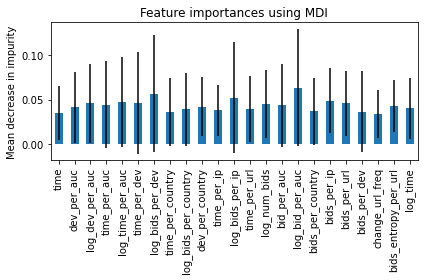

In [413]:
import pandas as pd
import matplotlib.pyplot as plt

forest_importances = pd.Series(importances, index=feature_cols)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [414]:
importances_abv_avg = forest_importances[forest_importances > forest_importances.mean()]

In [415]:
importances_abv_avg = importances_abv_avg.reset_index()

In [416]:
importances_abv_avg = list(importances_abv_avg['index'])

In [417]:
importances_abv_avg

['log_dev_per_auc',
 'time_per_auc',
 'log_time_per_auc',
 'time_per_dev',
 'log_bids_per_dev',
 'log_bids_per_ip',
 'log_num_bids',
 'log_bid_per_auc',
 'bids_per_ip',
 'bids_per_url']

## 3b. Import the models of your choice

Here we use the <code>RandomForestClassifier()</code> from Sklearn

In [418]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

cat_model = CatBoostClassifier(learning_rate= 0.1, random_seed = 5)
rf_model = RandomForestClassifier(random_state = 0)
clf_model = ExtraTreesClassifier(n_estimators=100, random_state=0)
ada_model = AdaBoostClassifier(n_estimators=100, random_state=0)

## 3c. Train-Test Split

We split the data to facilitate the evaluation of the model

In [420]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
import statistics
from sklearn import metrics


skf = StratifiedKFold(n_splits=5, shuffle= True)
skf.get_n_splits(X, y)
# print(skf)

k_fold_Acc = []
k_fold_Auc = []

for train_index, test_index in skf.split(X, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    k_fold_Acc.append(accuracy)
    k_fold_Auc.append(auc)
    
    
print('Average 10-fold acc:', round(statistics.mean(k_fold_Acc),4))
print('Average 10-fold auc:', round(statistics.mean(k_fold_Auc),4))

Average 10-fold acc: 0.9553
Average 10-fold auc: 0.6188


## 3d. Evaluate your model (using only train.csv)

We generate a randomforest model by fitting the training data using <code>.fit()</code>, and thereafter generate predictions using <code>.predict()</code>

We evalute the model's accuracy using <code>metrics.accuracy_score()</code>

In [314]:
# from sklearn import metrics

# accuracy = metrics.accuracy_score(y_test, y_pred)
# auc = metrics.roc_auc_score(y_test, y_pred)

# print('Accuracy:', round(accuracy, 4) * 100, '%')
# print('AUC:', round(auc, 4)) 

# # AUC definitely has room for improvement (It's your turn!)
# # But first, let's look at how we can generate the predictions.csv in the next section.

4.Generate and Export Predictions from your Final Model
===
***

## 4a. Re-fit your final model on train.csv

Say for instance you have already determined your final model for the submission, including:
1. optimal basket of feature columns, 
2. the most optimal model for this dataset, and 
3. the best parameters for the model you have chosen

You should then retrain the chosen model with the optimal parameters, on the chosen basket of features on **all the 2000+ rows of data you have** (instead of just on X_train, y_train). This is because you want to fully utilise your 2000+ rows of data to maximise what your model can learn!

In [421]:
final_rf_model = RandomForestClassifier(random_state = 0)

final_rf_model = final_rf_model.fit(X, y)

In [422]:
final_cat_model = CatBoostClassifier(learning_rate= 0.1, random_seed = 5)
final_cat_model.fit(X, y)

0:	learn: 0.5293385	total: 3.44ms	remaining: 3.44s
1:	learn: 0.4027283	total: 5.46ms	remaining: 2.72s
2:	learn: 0.3259300	total: 7.59ms	remaining: 2.52s
3:	learn: 0.2678772	total: 9.99ms	remaining: 2.49s
4:	learn: 0.2266242	total: 12.1ms	remaining: 2.4s
5:	learn: 0.2009105	total: 14.2ms	remaining: 2.35s
6:	learn: 0.1772565	total: 16.4ms	remaining: 2.33s
7:	learn: 0.1622718	total: 18.6ms	remaining: 2.31s
8:	learn: 0.1504688	total: 20.5ms	remaining: 2.25s
9:	learn: 0.1417448	total: 22.7ms	remaining: 2.24s
10:	learn: 0.1330591	total: 24.9ms	remaining: 2.24s
11:	learn: 0.1286483	total: 27ms	remaining: 2.23s
12:	learn: 0.1234066	total: 29.2ms	remaining: 2.21s
13:	learn: 0.1174331	total: 31ms	remaining: 2.19s
14:	learn: 0.1137986	total: 33.2ms	remaining: 2.18s
15:	learn: 0.1106659	total: 35ms	remaining: 2.15s
16:	learn: 0.1077922	total: 36.7ms	remaining: 2.12s
17:	learn: 0.1062793	total: 38.3ms	remaining: 2.09s
18:	learn: 0.1045365	total: 40.3ms	remaining: 2.08s
19:	learn: 0.1022424	total: 4

198:	learn: 0.0274654	total: 353ms	remaining: 1.42s
199:	learn: 0.0273236	total: 355ms	remaining: 1.42s
200:	learn: 0.0272509	total: 358ms	remaining: 1.42s
201:	learn: 0.0271405	total: 360ms	remaining: 1.42s
202:	learn: 0.0269754	total: 363ms	remaining: 1.42s
203:	learn: 0.0268157	total: 365ms	remaining: 1.43s
204:	learn: 0.0267089	total: 368ms	remaining: 1.43s
205:	learn: 0.0265805	total: 371ms	remaining: 1.43s
206:	learn: 0.0265504	total: 373ms	remaining: 1.43s
207:	learn: 0.0265078	total: 376ms	remaining: 1.43s
208:	learn: 0.0263135	total: 379ms	remaining: 1.43s
209:	learn: 0.0261883	total: 381ms	remaining: 1.43s
210:	learn: 0.0261783	total: 384ms	remaining: 1.44s
211:	learn: 0.0260542	total: 387ms	remaining: 1.44s
212:	learn: 0.0260191	total: 389ms	remaining: 1.44s
213:	learn: 0.0259409	total: 391ms	remaining: 1.44s
214:	learn: 0.0258371	total: 394ms	remaining: 1.44s
215:	learn: 0.0258204	total: 396ms	remaining: 1.44s
216:	learn: 0.0257389	total: 398ms	remaining: 1.44s
217:	learn: 

394:	learn: 0.0184602	total: 706ms	remaining: 1.08s
395:	learn: 0.0184573	total: 708ms	remaining: 1.08s
396:	learn: 0.0184304	total: 710ms	remaining: 1.08s
397:	learn: 0.0184291	total: 712ms	remaining: 1.08s
398:	learn: 0.0184092	total: 714ms	remaining: 1.08s
399:	learn: 0.0183894	total: 716ms	remaining: 1.07s
400:	learn: 0.0183579	total: 719ms	remaining: 1.07s
401:	learn: 0.0183290	total: 721ms	remaining: 1.07s
402:	learn: 0.0183217	total: 722ms	remaining: 1.07s
403:	learn: 0.0183167	total: 724ms	remaining: 1.07s
404:	learn: 0.0183102	total: 726ms	remaining: 1.07s
405:	learn: 0.0182766	total: 728ms	remaining: 1.06s
406:	learn: 0.0182672	total: 729ms	remaining: 1.06s
407:	learn: 0.0182281	total: 731ms	remaining: 1.06s
408:	learn: 0.0182270	total: 733ms	remaining: 1.06s
409:	learn: 0.0181933	total: 734ms	remaining: 1.06s
410:	learn: 0.0181902	total: 736ms	remaining: 1.05s
411:	learn: 0.0181832	total: 737ms	remaining: 1.05s
412:	learn: 0.0181689	total: 739ms	remaining: 1.05s
413:	learn: 

598:	learn: 0.0159802	total: 1.06s	remaining: 710ms
599:	learn: 0.0159787	total: 1.06s	remaining: 708ms
600:	learn: 0.0159755	total: 1.06s	remaining: 706ms
601:	learn: 0.0159668	total: 1.07s	remaining: 705ms
602:	learn: 0.0159506	total: 1.07s	remaining: 703ms
603:	learn: 0.0159338	total: 1.07s	remaining: 702ms
604:	learn: 0.0159261	total: 1.07s	remaining: 700ms
605:	learn: 0.0159206	total: 1.07s	remaining: 698ms
606:	learn: 0.0159194	total: 1.08s	remaining: 697ms
607:	learn: 0.0159114	total: 1.08s	remaining: 695ms
608:	learn: 0.0159035	total: 1.08s	remaining: 694ms
609:	learn: 0.0158962	total: 1.08s	remaining: 692ms
610:	learn: 0.0158932	total: 1.08s	remaining: 690ms
611:	learn: 0.0158864	total: 1.08s	remaining: 688ms
612:	learn: 0.0158679	total: 1.09s	remaining: 686ms
613:	learn: 0.0158533	total: 1.09s	remaining: 685ms
614:	learn: 0.0158487	total: 1.09s	remaining: 683ms
615:	learn: 0.0158375	total: 1.09s	remaining: 681ms
616:	learn: 0.0158289	total: 1.09s	remaining: 679ms
617:	learn: 

801:	learn: 0.0149789	total: 1.41s	remaining: 349ms
802:	learn: 0.0149756	total: 1.42s	remaining: 347ms
803:	learn: 0.0149743	total: 1.42s	remaining: 346ms
804:	learn: 0.0149723	total: 1.42s	remaining: 344ms
805:	learn: 0.0149709	total: 1.42s	remaining: 342ms
806:	learn: 0.0149681	total: 1.42s	remaining: 340ms
807:	learn: 0.0149658	total: 1.43s	remaining: 339ms
808:	learn: 0.0149632	total: 1.43s	remaining: 337ms
809:	learn: 0.0149616	total: 1.43s	remaining: 335ms
810:	learn: 0.0149591	total: 1.43s	remaining: 334ms
811:	learn: 0.0149571	total: 1.43s	remaining: 332ms
812:	learn: 0.0149543	total: 1.44s	remaining: 330ms
813:	learn: 0.0149533	total: 1.44s	remaining: 329ms
814:	learn: 0.0149520	total: 1.44s	remaining: 327ms
815:	learn: 0.0149442	total: 1.44s	remaining: 325ms
816:	learn: 0.0149404	total: 1.44s	remaining: 324ms
817:	learn: 0.0149404	total: 1.45s	remaining: 322ms
818:	learn: 0.0149370	total: 1.45s	remaining: 320ms
819:	learn: 0.0149319	total: 1.45s	remaining: 319ms
820:	learn: 

In [423]:
ada_model.fit(X, y)
ada_pred = ada_model.predict(X_kaggle)

## 4b. Generate predictions on 4700 rows of test.csv features into the model

In [424]:
X_kaggle.shape  # This is equivalent to your test_set[feature_cols]

(4700, 23)

Here we use <code>.predict_proba</code> instead of <code>.predict()</code> because this is the format which the Kaggle platform requires

In [425]:
probabilities = final_rf_model.predict_proba(X_kaggle)
probabilities

array([[1.  , 0.  ],
       [0.91, 0.09],
       [1.  , 0.  ],
       ...,
       [0.94, 0.06],
       [1.  , 0.  ],
       [0.97, 0.03]])

In [426]:
final_cat_pred = final_cat_model.predict_proba(X_kaggle)
final_cat_pred

array([[9.99855837e-01, 1.44162862e-04],
       [9.13542271e-01, 8.64577293e-02],
       [9.99958079e-01, 4.19214072e-05],
       ...,
       [9.95855738e-01, 4.14426162e-03],
       [9.99984927e-01, 1.50733406e-05],
       [9.99866023e-01, 1.33977073e-04]])

In [427]:
kaggle_preds = probabilities[:,1]  # Extract values from the rightmost column
kaggle_preds

array([0.  , 0.09, 0.  , ..., 0.06, 0.  , 0.03])

Make use of the <code>.to_csv()</code> function to output your predictions in the form of a csv, which will be the format you will be required to submit to Kaggle.

In [428]:
output_dataframe = pd.DataFrame({
    'bidder_id': test_set['bidder_id'],
    'prediction': kaggle_preds
})
output_dataframe.to_csv('my_predictions.csv', index=False)  

# Check for the .csv in the same folder as your Jupyter Notebook
# Try uploading this .csv to the Kaggle competition!

<div class="alert alert-block alert-warning">
<b>All the best to every team - may the best model win!</b>
</div>